In [1]:
import os
os.chdir(os.path.abspath('..'))

import torch
from scripts import model_loader
from model import pipeline

from PIL import Image
from transformers import CLIPTokenizer

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/vocab.json", merges_file="data/merges.txt")
model_file = "saved_checkpoints/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

for model_name, model in models.items():
    print(f"{model_name} model loaded: {type(model)}")

h:\Documents\GitHub\stable-diffusion-from-scratch\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


h:\Documents\GitHub\stable-diffusion-from-scratch\venv\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


encoder model loaded: <class 'model.encoder.VAE_Encoder'>
decoder model loaded: <class 'model.decoder.VAE_Decoder'>
diffusion model loaded: <class 'model.diffusion.Diffusion'>
clip model loaded: <class 'model.clip.CLIP'>


# Text-to-Image Architecture

CLIP encoding shape: torch.Size([2, 77, 768])
CLIP encoding stats: mean=-0.1090, std=1.0336
Initial latents shape: torch.Size([1, 4, 64, 64])
Initial latents mean: 0.0031, std: 0.9969


  2%|▏         | 1/50 [00:18<15:02, 18.41s/it]

Step 0, timestep: 980
UNet input stats: mean=0.0031, std=0.9969
UNet output stats: mean=0.0081, std=1.0001
Updated latents stats: mean=0.0016, std=0.9965
Step 1, timestep: 960


  4%|▍         | 2/50 [00:25<09:10, 11.47s/it]

UNet input stats: mean=0.0016, std=0.9964
UNet output stats: mean=0.0012, std=1.0001
Updated latents stats: mean=0.0043, std=0.9933
Step 2, timestep: 940


  6%|▌         | 3/50 [00:31<07:15,  9.26s/it]

UNet input stats: mean=0.0043, std=0.9933
UNet output stats: mean=-0.0089, std=0.9981
Updated latents stats: mean=0.0031, std=0.9975
Step 3, timestep: 920


  8%|▊         | 4/50 [00:39<06:31,  8.51s/it]

UNet input stats: mean=0.0031, std=0.9975
UNet output stats: mean=-0.0201, std=1.0018
Updated latents stats: mean=0.0043, std=0.9959
Step 4, timestep: 900


 10%|█         | 5/50 [00:46<06:01,  8.04s/it]

UNet input stats: mean=0.0043, std=0.9958
UNet output stats: mean=-0.0153, std=0.9969
Updated latents stats: mean=0.0111, std=0.9970
Step 5, timestep: 880


 12%|█▏        | 6/50 [00:53<05:41,  7.77s/it]

UNet input stats: mean=0.0111, std=0.9970
UNet output stats: mean=-0.0047, std=0.9965
Updated latents stats: mean=0.0115, std=0.9967
Step 6, timestep: 860


 14%|█▍        | 7/50 [01:00<05:23,  7.52s/it]

UNet input stats: mean=0.0115, std=0.9967
UNet output stats: mean=-0.0063, std=0.9968
Updated latents stats: mean=0.0152, std=0.9938
Step 7, timestep: 840


 16%|█▌        | 8/50 [01:07<05:08,  7.34s/it]

UNet input stats: mean=0.0152, std=0.9938
UNet output stats: mean=-0.0051, std=0.9927
Updated latents stats: mean=0.0131, std=0.9964
Step 8, timestep: 820


 18%|█▊        | 9/50 [01:14<04:57,  7.25s/it]

UNet input stats: mean=0.0131, std=0.9963
UNet output stats: mean=-0.0132, std=1.0029
Updated latents stats: mean=0.0174, std=0.9936
Step 9, timestep: 800


 20%|██        | 10/50 [01:21<04:50,  7.27s/it]

UNet input stats: mean=0.0174, std=0.9936
UNet output stats: mean=-0.0060, std=0.9951
Updated latents stats: mean=0.0197, std=0.9931


 22%|██▏       | 11/50 [01:28<04:42,  7.24s/it]

Step 10, timestep: 780
UNet input stats: mean=0.0197, std=0.9931
UNet output stats: mean=-0.0029, std=0.9977
Updated latents stats: mean=0.0235, std=0.9943
Step 11, timestep: 760


 24%|██▍       | 12/50 [01:36<04:37,  7.30s/it]

UNet input stats: mean=0.0235, std=0.9942
UNet output stats: mean=-0.0027, std=1.0015
Updated latents stats: mean=0.0227, std=0.9877
Step 12, timestep: 740


 26%|██▌       | 13/50 [01:43<04:31,  7.35s/it]

UNet input stats: mean=0.0227, std=0.9877
UNet output stats: mean=-0.0023, std=0.9888
Updated latents stats: mean=0.0292, std=0.9859
Step 13, timestep: 720


 28%|██▊       | 14/50 [01:51<04:26,  7.39s/it]

UNet input stats: mean=0.0292, std=0.9858
UNet output stats: mean=-0.0014, std=0.9880
Updated latents stats: mean=0.0303, std=0.9883
Step 14, timestep: 700


 30%|███       | 15/50 [01:59<04:23,  7.52s/it]

UNet input stats: mean=0.0303, std=0.9883
UNet output stats: mean=-0.0015, std=0.9867
Updated latents stats: mean=0.0310, std=0.9860
Step 15, timestep: 680


 32%|███▏      | 16/50 [02:07<04:20,  7.65s/it]

UNet input stats: mean=0.0310, std=0.9860
UNet output stats: mean=-0.0028, std=0.9819
Updated latents stats: mean=0.0311, std=0.9840
Step 16, timestep: 660


 34%|███▍      | 17/50 [02:14<04:10,  7.60s/it]

UNet input stats: mean=0.0311, std=0.9840
UNet output stats: mean=-0.0040, std=0.9802
Updated latents stats: mean=0.0302, std=0.9892
Step 17, timestep: 640


 36%|███▌      | 18/50 [02:22<04:01,  7.56s/it]

UNet input stats: mean=0.0302, std=0.9892
UNet output stats: mean=-0.0038, std=0.9838
Updated latents stats: mean=0.0353, std=0.9891
Step 18, timestep: 620


 38%|███▊      | 19/50 [02:29<03:52,  7.49s/it]

UNet input stats: mean=0.0353, std=0.9891
UNet output stats: mean=-0.0021, std=0.9837
Updated latents stats: mean=0.0390, std=0.9871
Step 19, timestep: 600


 40%|████      | 20/50 [02:37<03:47,  7.57s/it]

UNet input stats: mean=0.0390, std=0.9871
UNet output stats: mean=-0.0015, std=0.9805
Updated latents stats: mean=0.0436, std=0.9854


 42%|████▏     | 21/50 [02:45<03:42,  7.68s/it]

Step 20, timestep: 580
UNet input stats: mean=0.0436, std=0.9854
UNet output stats: mean=-0.0015, std=0.9782
Updated latents stats: mean=0.0500, std=0.9834
Step 21, timestep: 560


 44%|████▍     | 22/50 [02:52<03:34,  7.65s/it]

UNet input stats: mean=0.0500, std=0.9834
UNet output stats: mean=-0.0014, std=0.9740
Updated latents stats: mean=0.0527, std=0.9872
Step 22, timestep: 540


 46%|████▌     | 23/50 [03:00<03:28,  7.71s/it]

UNet input stats: mean=0.0527, std=0.9872
UNet output stats: mean=-0.0017, std=0.9760
Updated latents stats: mean=0.0589, std=0.9868
Step 23, timestep: 520


 48%|████▊     | 24/50 [03:08<03:19,  7.67s/it]

UNet input stats: mean=0.0589, std=0.9868
UNet output stats: mean=-0.0016, std=0.9781
Updated latents stats: mean=0.0630, std=0.9808
Step 24, timestep: 500


 50%|█████     | 25/50 [03:15<03:11,  7.66s/it]

UNet input stats: mean=0.0630, std=0.9808
UNet output stats: mean=-0.0019, std=0.9717
Updated latents stats: mean=0.0653, std=0.9773
Step 25, timestep: 480


 52%|█████▏    | 26/50 [03:23<03:03,  7.63s/it]

UNet input stats: mean=0.0653, std=0.9773
UNet output stats: mean=-0.0012, std=0.9672
Updated latents stats: mean=0.0659, std=0.9759
Step 26, timestep: 460


 54%|█████▍    | 27/50 [03:31<02:58,  7.76s/it]

UNet input stats: mean=0.0659, std=0.9759
UNet output stats: mean=-0.0017, std=0.9677
Updated latents stats: mean=0.0688, std=0.9769
Step 27, timestep: 440


 56%|█████▌    | 28/50 [03:39<02:51,  7.79s/it]

UNet input stats: mean=0.0688, std=0.9769
UNet output stats: mean=-0.0019, std=0.9694
Updated latents stats: mean=0.0706, std=0.9756
Step 28, timestep: 420


 58%|█████▊    | 29/50 [03:47<02:44,  7.85s/it]

UNet input stats: mean=0.0706, std=0.9756
UNet output stats: mean=-0.0017, std=0.9671
Updated latents stats: mean=0.0761, std=0.9786
Step 29, timestep: 400


 60%|██████    | 30/50 [03:55<02:37,  7.90s/it]

UNet input stats: mean=0.0761, std=0.9786
UNet output stats: mean=-0.0013, std=0.9680
Updated latents stats: mean=0.0781, std=0.9763


 62%|██████▏   | 31/50 [04:03<02:30,  7.94s/it]

Step 30, timestep: 380
UNet input stats: mean=0.0781, std=0.9763
UNet output stats: mean=-0.0011, std=0.9673
Updated latents stats: mean=0.0811, std=0.9715
Step 31, timestep: 360


 64%|██████▍   | 32/50 [04:11<02:22,  7.92s/it]

UNet input stats: mean=0.0811, std=0.9714
UNet output stats: mean=-0.0015, std=0.9605
Updated latents stats: mean=0.0833, std=0.9691
Step 32, timestep: 340


 66%|██████▌   | 33/50 [04:18<02:13,  7.88s/it]

UNet input stats: mean=0.0833, std=0.9690
UNet output stats: mean=-0.0020, std=0.9564
Updated latents stats: mean=0.0842, std=0.9661
Step 33, timestep: 320


 68%|██████▊   | 34/50 [04:26<02:02,  7.65s/it]

UNet input stats: mean=0.0842, std=0.9661
UNet output stats: mean=-0.0017, std=0.9510
Updated latents stats: mean=0.0897, std=0.9644
Step 34, timestep: 300


 70%|███████   | 35/50 [04:33<01:51,  7.45s/it]

UNet input stats: mean=0.0897, std=0.9643
UNet output stats: mean=-0.0014, std=0.9468
Updated latents stats: mean=0.0951, std=0.9606
Step 35, timestep: 280


 72%|███████▏  | 36/50 [04:40<01:44,  7.46s/it]

UNet input stats: mean=0.0951, std=0.9606
UNet output stats: mean=-0.0009, std=0.9399
Updated latents stats: mean=0.0978, std=0.9557
Step 36, timestep: 260


 74%|███████▍  | 37/50 [04:47<01:34,  7.25s/it]

UNet input stats: mean=0.0978, std=0.9557
UNet output stats: mean=-0.0011, std=0.9297
Updated latents stats: mean=0.1013, std=0.9507
Step 37, timestep: 240


 76%|███████▌  | 38/50 [04:53<01:24,  7.05s/it]

UNet input stats: mean=0.1013, std=0.9507
UNet output stats: mean=-0.0013, std=0.9231
Updated latents stats: mean=0.1015, std=0.9462
Step 38, timestep: 220


 78%|███████▊  | 39/50 [05:00<01:17,  7.07s/it]

UNet input stats: mean=0.1015, std=0.9462
UNet output stats: mean=-0.0017, std=0.9183
Updated latents stats: mean=0.1029, std=0.9428
Step 39, timestep: 200


 80%|████████  | 40/50 [05:07<01:09,  6.98s/it]

UNet input stats: mean=0.1029, std=0.9428
UNet output stats: mean=-0.0019, std=0.9082
Updated latents stats: mean=0.1046, std=0.9411


 82%|████████▏ | 41/50 [05:14<01:01,  6.79s/it]

Step 40, timestep: 180
UNet input stats: mean=0.1046, std=0.9411
UNet output stats: mean=-0.0018, std=0.9026
Updated latents stats: mean=0.1066, std=0.9388
Step 41, timestep: 160


 84%|████████▍ | 42/50 [05:20<00:53,  6.63s/it]

UNet input stats: mean=0.1066, std=0.9388
UNet output stats: mean=-0.0019, std=0.8913
Updated latents stats: mean=0.1101, std=0.9400
Step 42, timestep: 140


 86%|████████▌ | 43/50 [05:26<00:45,  6.54s/it]

UNet input stats: mean=0.1101, std=0.9400
UNet output stats: mean=-0.0017, std=0.8841
Updated latents stats: mean=0.1140, std=0.9365
Step 43, timestep: 120


 88%|████████▊ | 44/50 [05:33<00:39,  6.52s/it]

UNet input stats: mean=0.1140, std=0.9365
UNet output stats: mean=-0.0016, std=0.8703
Updated latents stats: mean=0.1166, std=0.9330
Step 44, timestep: 100


 90%|█████████ | 45/50 [05:39<00:32,  6.45s/it]

UNet input stats: mean=0.1166, std=0.9329
UNet output stats: mean=-0.0018, std=0.8586
Updated latents stats: mean=0.1194, std=0.9289
Step 45, timestep: 80


 92%|█████████▏| 46/50 [05:45<00:25,  6.42s/it]

UNet input stats: mean=0.1194, std=0.9289
UNet output stats: mean=-0.0018, std=0.8390
Updated latents stats: mean=0.1223, std=0.9268
Step 46, timestep: 60


 94%|█████████▍| 47/50 [05:52<00:19,  6.38s/it]

UNet input stats: mean=0.1223, std=0.9268
UNet output stats: mean=-0.0018, std=0.8201
Updated latents stats: mean=0.1239, std=0.9262
Step 47, timestep: 40


 96%|█████████▌| 48/50 [05:58<00:13,  6.51s/it]

UNet input stats: mean=0.1239, std=0.9262
UNet output stats: mean=-0.0014, std=0.7891
Updated latents stats: mean=0.1261, std=0.9242
Step 48, timestep: 20


 98%|█████████▊| 49/50 [06:05<00:06,  6.49s/it]

UNet input stats: mean=0.1261, std=0.9241
UNet output stats: mean=-0.0013, std=0.7288
Updated latents stats: mean=0.1279, std=0.9197
Step 49, timestep: 0


100%|██████████| 50/50 [06:12<00:00,  7.45s/it]

UNet input stats: mean=0.1279, std=0.9196
UNet output stats: mean=-0.0018, std=0.4071
Updated latents stats: mean=0.1280, std=0.9195


Final latents stats: mean=0.1280, std=0.9195
Decoded image stats: min=0.0000, max=255.0000, mean=102.6625


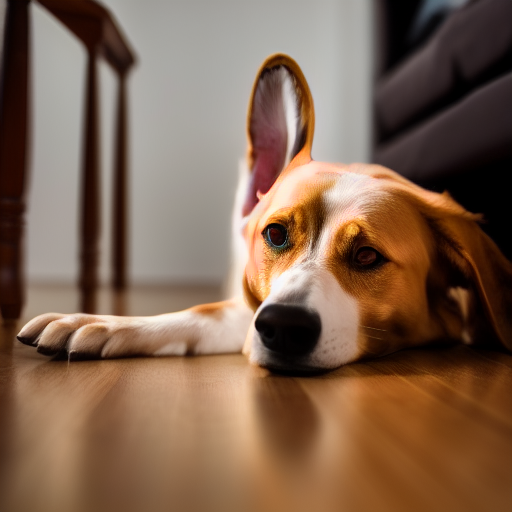

In [2]:
prompt = "A dog stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution."
uncond_prompt = "" # You can use it as a negative prompt
do_cfg = True
cfg_scale = 7
sampler = "ddpm"

input_image = None
strength = 0.6

num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    seed=seed,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

Image.fromarray(output_image)

# Image-to-Image Architecture

In [3]:
input_image = None
image_path = "images/dog.jpg"
# input_image = Image.open(image_path)
strength = 0.8

sampler = "ddpm"
num_inference_steps = 50
seed = 42 # Lucky number

In [4]:
import os
print(os.getcwd())

h:\Documents\GitHub\stable-diffusion-from-scratch
